In [31]:
folderPath = '/nas-ssd2/joykirat/code/verl-fork/verl/scripts/train/verlCheckpoint/Summary/qwen4b_dapo_math_10k_context_linear_reward_with_summary_attention_loss_original/rollout'
import os
import json
files = os.listdir(folderPath)
data = []
for file in files:
    if file.endswith('.jsonl'):
        temp = []
        with open(os.path.join(folderPath, file), 'r') as f:
            for line in f:
                temp.append(json.loads(line))
        data.append(temp)

In [32]:
data[0][0]

{'data_source': 'DAPO-Math-17k',
 'prompt': "user\nIn triangle $ABC$, $\\sin \\angle A = \\frac{4}{5}$ and $\\angle A < 90^\\circ$. Let $D$ be a point outside triangle $ABC$ such that $\\angle BAD = \\angle DAC$ and $\\angle BDC = 90^\\circ$. Suppose that $AD = 1$ and that $\\frac{BD}{CD} = \\frac{3}{2}$. If $AB + AC$ can be expressed in the form $\\frac{a\\sqrt{b}}{c}$ where $a, b, c$ are pairwise relatively prime integers, find $a + b + c$. Let's think step by step and output the final answer within \\boxed{}.\nassistant\n",
 'response': "<think>\nOkay, let's try to tackle this geometry problem. It seems a bit complex, but if I break it down step by step, maybe I can figure it out. Let me start by writing down all the given information and see what I can derive from it.\n\nFirst, triangle ABC with angle A having sine 4/5 and angle A is less than 90 degrees. So angle A is acute. Then there's a point D outside the triangle such that angle BAD equals angle DAC, so D is on the angle bise

In [33]:
reward_original = []
reward_compressed = []
for d in data:
    temp_original = []
    temp_compressed = []
    for line in d:
        if '<think><think>' in line['response']:
            temp_compressed.append(line['final_reward'])
        else:
            temp_original.append(line['final_reward'])
    if len(temp_original) > 0:
        reward_original.append(sum(temp_original) / len(temp_original))
    # else:
    #     reward_original.append(0)
    if len(temp_compressed) > 0:
        reward_compressed.append(sum(temp_compressed) / len(temp_compressed))
    # else:
    #     reward_compressed.append(0)





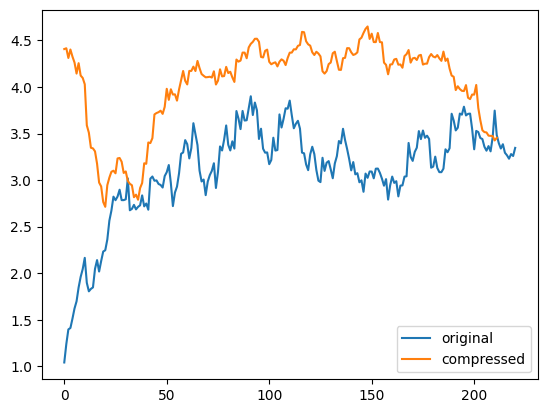

In [34]:
# plot both the original and compressed reward
import matplotlib.pyplot as plt
import numpy as np

reward_original = np.array(reward_original)
reward_compressed = np.array(reward_compressed)
## smooth the plot, window size 10
reward_original = np.convolve(reward_original, np.ones(10)/10, mode='valid')
reward_compressed = np.convolve(reward_compressed, np.ones(10)/10, mode='valid')
plt.plot(reward_original, label='original')
plt.plot(reward_compressed, label='compressed')
plt.legend()
plt.show()

In [2]:
import os

os.environ['HF_HOME'] = '/nas-ssd2/joykirat/.cache/huggingface'
os.environ['CUDA_VISIBLE_DEVICES'] = '7'
from transformers import AutoTokenizer, AutoModelForCausalLM
from vllm import LLM

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-4B")
# model = LLM(model="Qwen/Qwen3-4B", gpu_memory_utilization=0.95, tensor_parallel_size=1, task="embed")





INFO 08-22 16:29:29 [importing.py:53] Triton module has been replaced with a placeholder.
INFO 08-22 16:29:29 [__init__.py:239] Automatically detected platform cuda.


In [2]:
model.encode("Hello, world! </think>")

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


[PoolingRequestOutput(request_id='0', outputs=PoolingOutput(data=tensor([ 0.0008,  0.0162, -0.0035,  ..., -0.0022, -0.0210,  0.0208])), prompt_token_ids=[9707, 11, 1879, 0, 220, 151668], finished=True)]

In [3]:
import json
data = []
with open('/nas-ssd2/joykirat/code/verl-fork/verl/scripts/eval/verlCheckpoint/mathbaseRun/qwen4b_10k_base_model/rollout/val_0.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))
        

In [4]:
import numpy as np

accuracy_by_source = {}
for line in data:
    if line['data_source'] not in accuracy_by_source:
        accuracy_by_source[line['data_source']] = []
    accuracy_by_source[line['data_source']].append(line['final_reward'])
    
for source in accuracy_by_source:
    mean_accuracy = np.mean(accuracy_by_source[source])
    print(source, mean_accuracy)
    
    

math-aime 0.636
gpqa 0.42
math-amc 0.892


In [5]:
import numpy as np
response_length_list = {}
from tqdm import tqdm
for line in tqdm(data):
    if line['data_source'] not in response_length_list:
        response_length_list[line['data_source']] = []
    response_length_list[line['data_source']].append(len(tokenizer.encode(line['response'])))
    
for source in response_length_list:
    mean_response_length = np.mean(response_length_list[source])
    print(source, mean_response_length)
    
    
    
            
            
            

100%|██████████| 750/750 [00:11<00:00, 62.88it/s]

math-aime 16270.376
gpqa 10175.228
math-amc 10342.512


In [60]:
line['response']

"<think>\nOkay, so I need to figure out for how many integers n between 1 and 22 inclusive, the denominator k_n of the harmonic series H_n = 1 + 1/2 + 1/3 + ... + 1/n is less than L_n, the least common multiple of 1 through n. \n\nFirst, I remember that when you add fractions, the denominator of the sum is the least common multiple of the denominators divided by some factors. But since the harmonic series is being expressed in reduced form, the denominator k_n is L_n divided by some factors that come from the numerator. So, k_n = L_n / d, where d is the greatest common divisor of the numerator and L_n. Therefore, k_n < L_n is equivalent to d > 1. So, the question becomes: for how many n between 1 and 22 is the numerator of H_n (when expressed in lowest terms) not coprime with L_n?\n\nAlternatively, since H_n = h_n / k_n = (sum_{i=1}^n 1/i) = (some numerator) / L_n, but reduced. Therefore, k_n = L_n / gcd(numerator, L_n). Therefore, k_n < L_n iff gcd(numerator, L_n) > 1.\n\nTherefore, t

In [61]:
len(tokenizer.encode(line['response']))

10000